In [64]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
from scipy.optimize import fsolve, root
import copy

pi = math.pi

def pied (x):
    while x>pi:
        x -= pi
    return (x)

def pi2ed (x):
    while x>pi/2:
        x -= pi/2
    return (x)

data = np.load("sphere_render/meas_simulation.npz")
Is = data['I']
Iups = data['Iups']
Ips = data['Ips']
psis = data['psis']
xmap = data['xmap']
ymap = data['ymap']
phis0 = data['phis']
thetas0 = data['thetas']
dm = data['dm']

ymax, xmax, imax = Is.shape

phis = np.zeros((ymax,xmax))
thetas = np.zeros((ymax,xmax))
ns = np.zeros((ymax,xmax))

ph = 1
th = 1
n = 1.6
kol = 0
fal = 0

def nearest_nonzero_idx(a,x,y):
    idx = np.argwhere(a)
    return idx[((idx - [x,y])**2).sum(1).argmin()]

def fill_with_neasest(ymap):
    a = copy.deepcopy(ymap)
    for y in range (0, ymap.shape[0]):
        for x in range(0,ymap.shape[0]):
            if a[y,x] == 0:
                y1, x1 = nearest_nonzero_idx(a, y, x)
                a[y,x] = a[y1,x1]
    return a



In [53]:
def indtoangle (psj, thj):
    return (psj*2*pi/1000 - pi, thj*(pi/2)/1000)

def angletoind (ph, th):
    thmap = int(math.floor(th*xmap.shape[0]/(pi/2+0.1)))
    phmap = int(math.floor((ph+pi)*xmap.shape[1]/(2*pi+0.1)))
    return (phmap*5, thmap*5)

In [68]:
def system (p, *args):
    angles = [0, pi/6, pi/3, pi/2, 2*pi/3, 5*pi/6]
    ph, th, n = p
    I = args[0]
    thmap = int(math.floor(th*xmap.shape[0]/(pi/2+0.1)))
    phmap = int(math.floor((ph+pi)*xmap.shape[1]/(2*pi+0.1)))
    if (0<thmap<200) and (0<phmap<200):
        x = int(xmap[thmap,phmap])
        y = int(ymap[thmap,phmap])
    else:
        x = y = 0
    Iup = Iups[y,x]
    Ip = Ips[y,x]
    ps = psis[y,x]
#     I = Is[y,x,:].flatten()
#     print (Iup, Ip, ps, I)
    if (np.isnan(dm[y,x])) or ((max(I)-min(I))<0.001):
        return (100, 100, 100, 100, 100, 100)
    return (
        (Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[0]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[0]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[0]))**2 - I[0],
        (Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[1]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[1]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[1]))**2 - I[1],
        (Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[2]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[2]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[2]))**2 - I[2],
        (Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[3]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[3]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[3]))**2 - I[3],
        (Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[4]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[4]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[4]))**2 - I[4],
        (Iup/2) * (((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(math.sin(ph - angles[5]))**2 + (((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*(1 - (math.sin(ph - angles[5]))**2)) + Ip*((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.cos(ps))**2) + ((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)*((math.sin(ps))**2))*(math.cos(math.atan((math.tan(ps))*math.sqrt((((-n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2))/(n**2*(math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2)/((((math.cos(th)) - math.sqrt(n**2 - (math.sin(th))**2))/((math.cos(th)) + math.sqrt(n**2 - (math.sin(th))**2)))**2))) + ph - angles[5]))**2 - I[5]
    )

def system1 (p, *args):
    angles = [0, pi/6, pi/3, pi/2, 2*pi/3, 5*pi/6]
    ph, th, n = p
    I = args[0]
#     print (I)
    thmap = int(math.floor(th*xmap.shape[0]/(pi/2+0.1)))
    phmap = int(math.floor((ph+pi)*xmap.shape[1]/(2*pi+0.1)))
    if (0<thmap<200) and (0<phmap<200):
        x = int(xmap[thmap,phmap])
        y = int(ymap[thmap,phmap])
    else:
        x = y = 0
    Iup = Iups[y,x]
    Ip = Ips[y,x]
    ps = psis[y,x]
#     if 1.5<n<1.7:
#         return(100,100,100,100,100,100)
    n2 = n**2
    if n2 < 1:
        n2 = n2 + 1
    Ip = 0
    ps = 0
    sps2 = (math.sin(ps))**2
    cps2 = (math.cos(ps))**2
    tps = math.tan(ps)
    cth = math.cos(th)
    sth = math.sin(th)
#     print (n2, sth)
    Rs = ((cth - math.sqrt(n2 - sth**2))/(cth + math.sqrt(n2 - sth**2)))**2
    Rp = ((-n2*cth + math.sqrt(n2 - sth**2))/(n2*cth + math.sqrt(n2 - sth**2)))**2
#     print (I)
    return (
        (Iup/2) * (Rs*(math.sin(ph - angles[0]))**2 + Rp*(1 - (math.sin(ph - angles[0]))**2)) + Ip*(Rp*cps2 + Rs*sps2)*(math.cos(math.atan(tps*math.sqrt(Rp/Rs)) + ph - angles[0]))**2 - I[0],
        (Iup/2) * (Rs*(math.sin(ph - angles[1]))**2 + Rp*(1 - (math.sin(ph - angles[1]))**2)) + Ip*(Rp*cps2 + Rs*sps2)*(math.cos(math.atan(tps*math.sqrt(Rp/Rs)) + ph - angles[1]))**2 - I[1],
        (Iup/2) * (Rs*(math.sin(ph - angles[2]))**2 + Rp*(1 - (math.sin(ph - angles[2]))**2)) + Ip*(Rp*cps2 + Rs*sps2)*(math.cos(math.atan(tps*math.sqrt(Rp/Rs)) + ph - angles[2]))**2 - I[2],
        (Iup/2) * (Rs*(math.sin(ph - angles[3]))**2 + Rp*(1 - (math.sin(ph - angles[3]))**2)) + Ip*(Rp*cps2 + Rs*sps2)*(math.cos(math.atan(tps*math.sqrt(Rp/Rs)) + ph - angles[3]))**2 - I[3],
        (Iup/2) * (Rs*(math.sin(ph - angles[4]))**2 + Rp*(1 - (math.sin(ph - angles[4]))**2)) + Ip*(Rp*cps2 + Rs*sps2)*(math.cos(math.atan(tps*math.sqrt(Rp/Rs)) + ph - angles[4]))**2 - I[4],
        (Iup/2) * (Rs*(math.sin(ph - angles[5]))**2 + Rp*(1 - (math.sin(ph - angles[5]))**2)) + Ip*(Rp*cps2 + Rs*sps2)*(math.cos(math.atan(tps*math.sqrt(Rp/Rs)) + ph - angles[5]))**2 - I[5],
        n2 - 2.56
    )

In [66]:
xmap = fill_with_neasest(xmap)
ymap = fill_with_neasest(ymap)

In [79]:
# going through all angles and ns
y = 220
x = 320
ph = phis0[y,x]
th = thetas0[y,x]
n = 1.6
I = Is[y,x,:].flatten()
sz = 1000

res = np.zeros((sz, sz, 10))

nl = 1
for ll in range (0, 10):
    nl += 0.1
    psj = -pi
    for ii in range(0,sz):
        psj += 2*pi/sz
        thj = 0
        for jj in range(0,sz):
            thj += (pi/2)/sz
            res1 = system((psj, thj, nl), (I))
            res1 = [abs(xx) for xx in res1]
            res[ii, jj, ll] = sum(res1)
        

In [80]:
ind = np.unravel_index(np.argmin(res, axis=None), res.shape)
print(ind, res[ind])
print (indtoangle(ind[0], ind[1]))
print (ph,th)
# ff = angletoind(ph,th)
# print (ff, res[ff[0], ff[1]])

(562, 491, 5) 0.0004317969958689844
(0.3895574890451341, 0.7712609964562943)
0.39564903020521547 0.7720639165612292


In [69]:
# going through all angles with fixed n
y = 220
x = 320
ph = phis0[y,x]
th = thetas0[y,x]
n = 1.6
I = Is[y,x,:].flatten()
sz = 1000

res = np.zeros((sz, sz))

psj = -pi
for ii in range(0,sz):
    psj += 2*pi/sz
    thj = 0
    for jj in range(0,sz):
        thj += (pi/2)/sz
        res1 = system((psj, thj, n), (I))
        res1 = [abs(xx) for xx in res1]
        res[ii, jj] = sum(res1)
        

In [78]:
# solving this shit for one pixel
y = 220
x = 320
ph = phis0[y,x]
th = thetas0[y,x]
n = 1.6
I = Is[y,x,:].flatten()
sz = 1000

sol = root(system, (0.4, 0.7, n), args=(I), method='lm', tol=0.000001)
print (sol.x[0], sol.x[1], sol.x[2])
res1 = system((sol.x[0], sol.x[1], sol.x[2]),(I))
res1 = [abs(xx) for xx in res1]
res = sum(res1)
print (res)

0.5759211064514037 0.6850236022468741 1.6937128398646317
0.009286695146609038


In [70]:
ind = np.unravel_index(np.argmin(res, axis=None), res.shape)
print(ind, res[ind])
print (indtoangle(ind[0], ind[1]))
print (ph,th)
ff = angletoind(ph,th)
print (ff, res[ff[0], ff[1]])

(562, 491) 0.0004317969958688708
(0.3895574890451341, 0.7712609964562943)
0.39564903020521547 0.7720639165612292
(550, 460) 0.07910843732989203


In [48]:
xmap.shape

(200, 200)

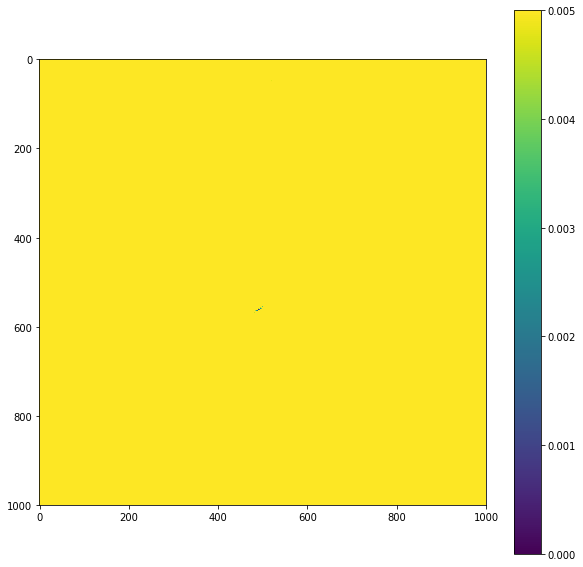

In [71]:
plt.figure(figsize=(10,10))
plt.imshow(res)
plt.colorbar()
plt.clim(0,0.005)
plt.show()

In [ ]:
y = 300
x = 250
ph = phis0[y,x]
th = thetas0[y,x]
th0 = 0.9
ph0 = 1.1
n = 1.6
I = Is[y,x,:].flatten()

sol = root(system1, (ph0, th0, 1.6), args=(I), method='lm', tol=0.000001)
print (sol.x[0], th, sol.x[2], system1((sol.x[0], sol.x[1], sol.x[2]),(I)))
print (ph, th, n, system1((ph, th, n),(I)))

In [ ]:
ph = 1.1
th = 0.9
phis = np.zeros((ymax,xmax))
thetas = np.zeros((ymax,xmax))
ns = np.zeros((ymax,xmax))
for y in range(0, 500):
    if y%100 == 0:
        print ("y =", y)
    for x in range (0, 500):
        if np.isnan(dm[y,x]):
            continue

        I = Is[y,x,:].flatten()
        sol = root(system1, (1.1, 0.9, 1.6), args=(I), method='lm', tol=0.00001)
            
        ph = pied(sol.x[0])
        th = pi2ed(sol.x[1])
        phis[y,x] = sol.x[0]
        thetas[y,x] = sol.x[1]
        ns[y,x] = sol.x[2]
        ress = system1((sol.x[0], sol.x[1], sol.x[2]), (I))
        ress1 = [abs(xx) for xx in ress]
#         print (sum(ress1), sol.x[2])

In [ ]:
res1 = system1((1.5796033696071434, 0.9459872649068347, 1.997700058230306), (I))
# print (ph, th)
print (res1)
res1 = [abs(xx) for xx in res1]
res0 = sum(res1)
print ("real =", res0)

In [ ]:
phsh = -pi + 375*2*pi/1000
thsh = 823*pi/(2*1000)
print (phsh, thsh)
res1 = system((phsh, thsh, 1.6))
print (res1)

In [ ]:
phsh = -pi + 592*2*pi/1000
thsh = 464*pi/(2*1000)
print (phsh, thsh)
res1 = system((phsh, thsh, 1.6))
print (res1)

In [ ]:
# res[ind] = 1
thetas[250,249]

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(phis)
plt.colorbar()
plt.clim(-pi,pi)
plt.show()


# 75*(pi/2+0.1)/100

In [ ]:
pi

### I get wrong minimum with 0 value. find the reason. 

Unfortunately, the method generates faulty mins. On the example above (50, 70) is the minimum, although not the correct one. And correct one won't appear, because 1 pixel error in remapping make it bigger than phantom min. This can be fixed in the simulation but won't work stable in the actual system.

In [ ]:
Run tests with:
    ps = 0
    Ip = 0
    
and see if I get classic results

In [ ]:
Is = data['I']
Iups = data['Iups']
Ips = data['Ips']
psis = data['psis']
xmap = data['xmap']
ymap = data['ymap']
phis0 = data['phis']
thetas0 = data['thetas']
dm = data['dm']

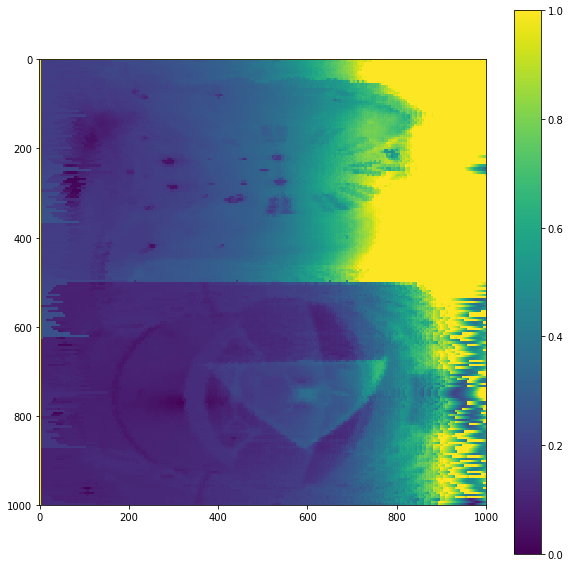

In [40]:
plt.figure(figsize=(10,10))
plt.imshow(res)
plt.colorbar()
plt.clim(0,1)
plt.show()